In [1]:
import pandas
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import initializers
import matplotlib.pyplot as plt

S:\Anaconda\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
S:\Anaconda\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
S:\Anaconda\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
S:\Anaconda\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [2]:
def plot_results(history, filename=""):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    epochs = range(1, len(loss) + 1)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,20))
    fig.suptitle('Loss and accuracy')

    ax1.plot(epochs, loss, color="green", label='Training loss')
    ax1.plot(epochs, val_loss, color="blue", label='Validation loss')
    # axs[0].xlabel('Epochs')
    # axs[0].ylabel('Loss')
    ax1.legend()

    ax2.plot(epochs, acc, color="green", label='Training acc')
    ax2.plot(epochs, val_acc, color="blue", label='Validation acc')
    # xs[1].xlabel('Epochs')
    # s[1].ylabel('Accuracy')
    ax2.legend()

    plt.show()

    if (filename != ""):
        plt.savefig(filename)

In [3]:
def training_summary(history):
    h = history.history
    print(
"Training loss:   {}\nValidation loss: {}\nTraining acc:    {}\nValidation acc:  {}"
        .format(
        h["loss"][-1],
        h["val_loss"][-1],
        h["acc"][-1],
        h["val_acc"][-1])
    )

In [4]:
dataframe = pandas.read_csv("sonar.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

In [5]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# Первоначальная архитектура

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Training loss:   0.026294071556014174
Validation loss: 0.9201804640747252
Training acc:    1.0
Validation acc:  0.5714285969734192


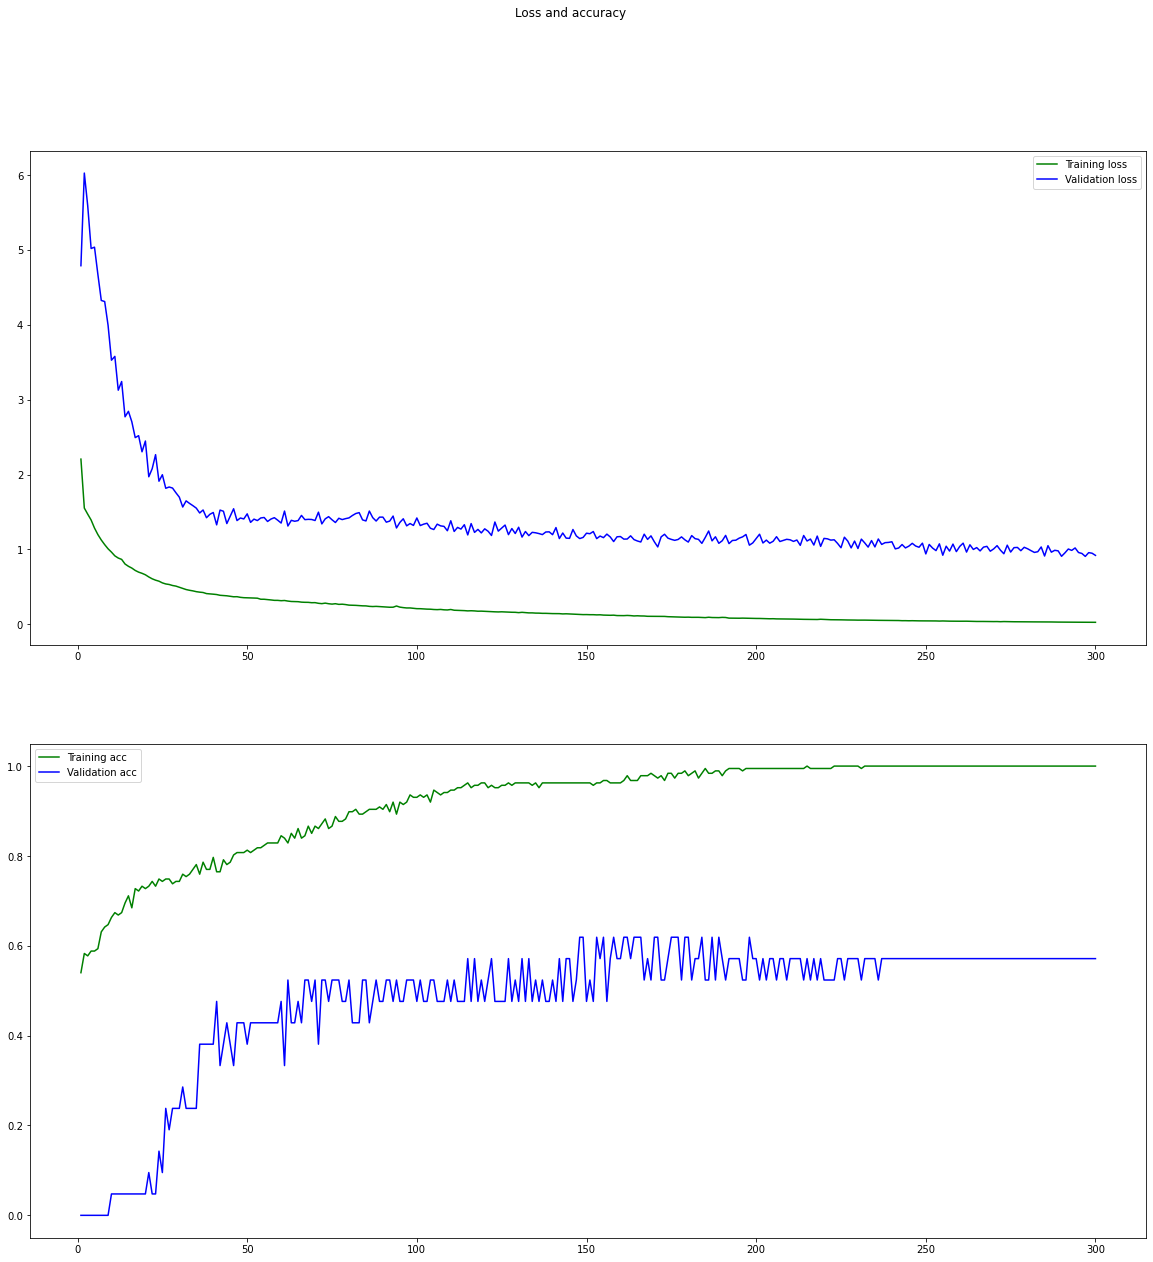

In [6]:
model = Sequential()
model.add(Dense(60, input_dim=60, kernel_initializer=initializers.RandomNormal(stddev=1), activation="relu"))
model.add(Dense(1, kernel_initializer=initializers.RandomNormal(stddev=1), activation="sigmoid"))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
training_history = model.fit(X, encoded_Y, epochs=300, batch_size=10, validation_split=0.1, verbose=False)

training_summary(training_history)
plot_results(training_history)
# print(training_history.history.keys())

# Уменьшили размер входного слоя в два раза

Training loss:   0.13997110939599613
Validation loss: 0.734923988403309
Training acc:    0.9679144620895386
Validation acc:  0.6666666865348816


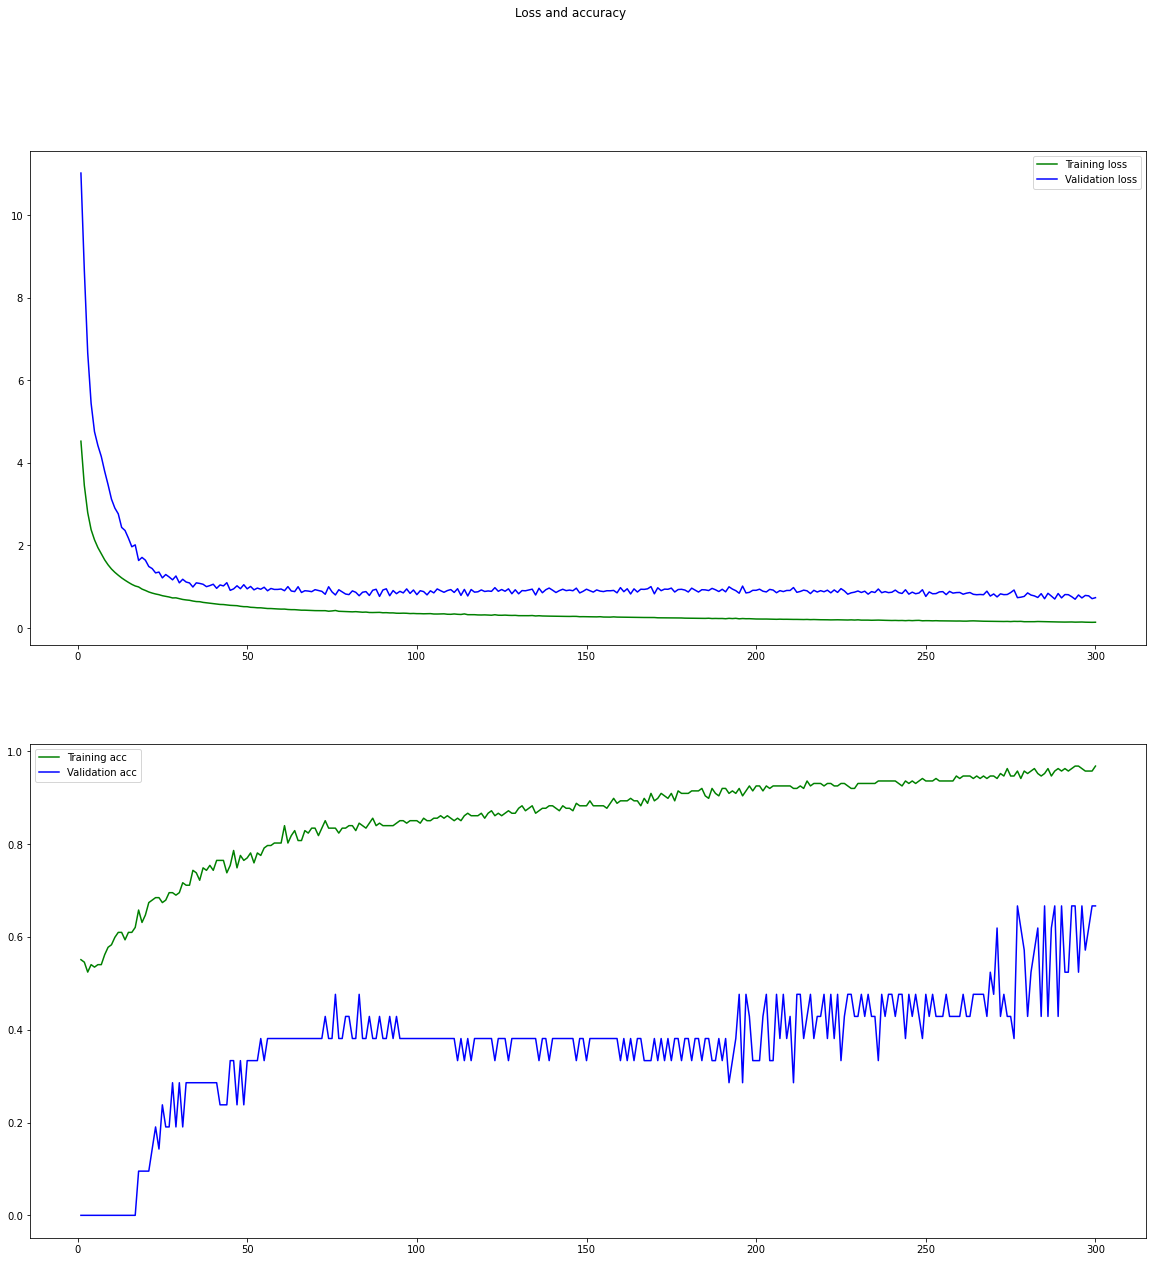

In [7]:
model = Sequential()
model.add(Dense(30, input_dim=60, kernel_initializer=initializers.RandomNormal(stddev=1), activation="relu"))
model.add(Dense(1, kernel_initializer=initializers.RandomNormal(stddev=1), activation="sigmoid"))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
training_history = model.fit(X, encoded_Y, epochs=300, batch_size=10, validation_split=0.1, verbose=False)

training_summary(training_history)
plot_results(training_history)

# Добавили скрытый слой к изначальной архитектуре

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Training loss:   0.001208914404941653
Validation loss: 0.8770652610719913
Training acc:    1.0
Validation acc:  0.6666666865348816


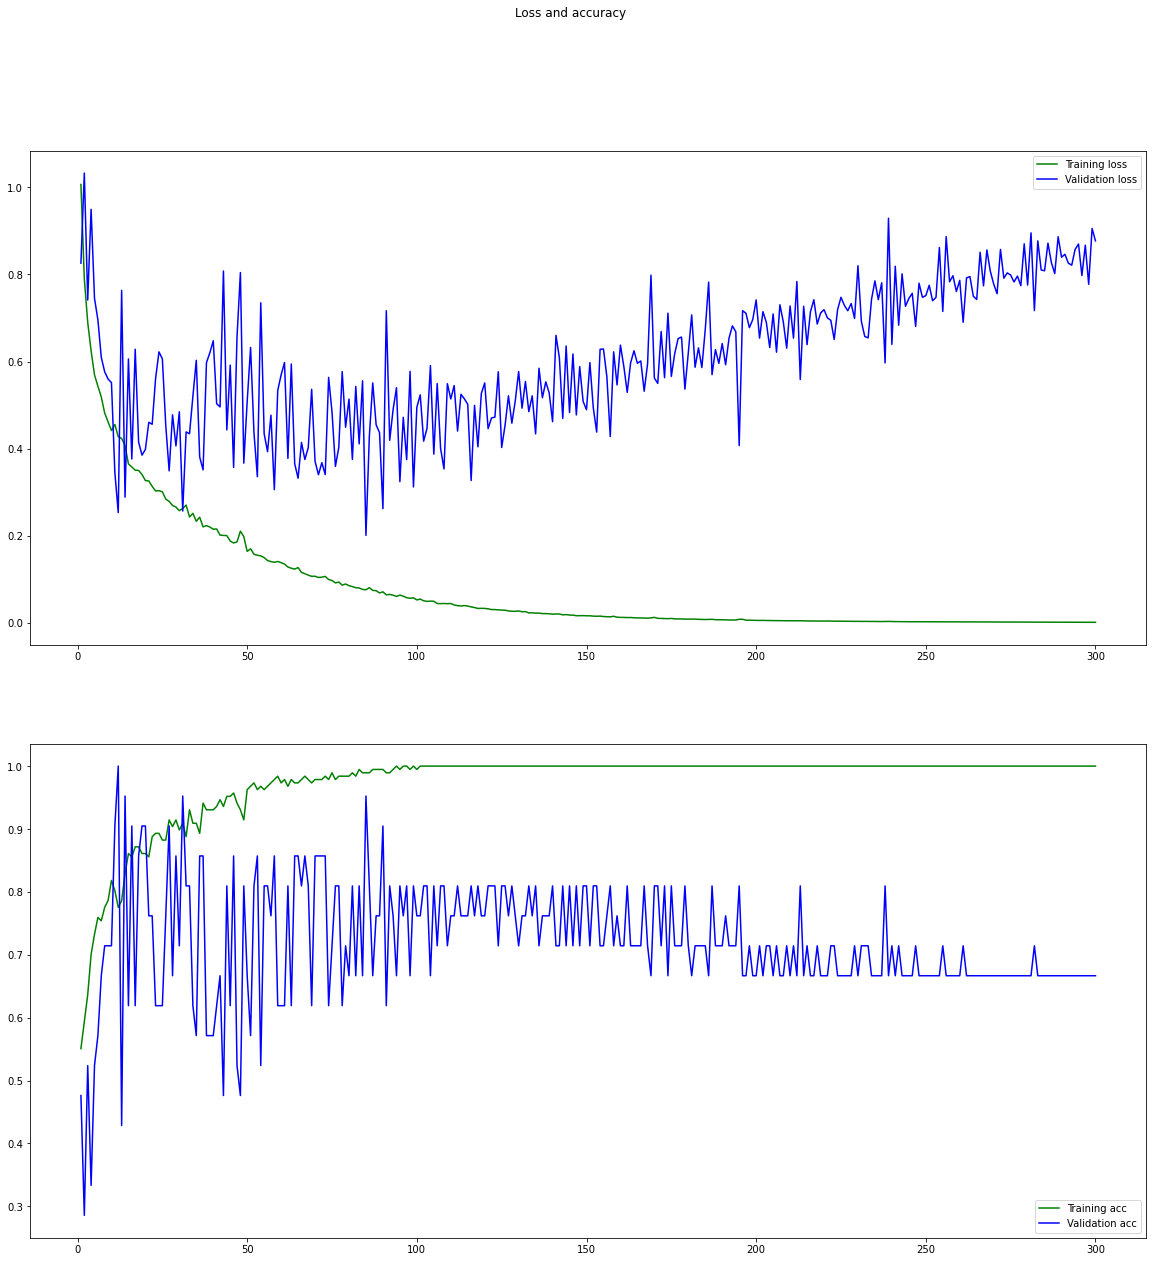

In [8]:
model = Sequential()
model.add(Dense(60, input_dim=60, kernel_initializer=initializers.RandomNormal(stddev=1), activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(1, kernel_initializer=initializers.RandomNormal(stddev=1), activation="sigmoid"))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
training_history = model.fit(X, encoded_Y, epochs=300, batch_size=10, validation_split=0.1, verbose=False)

training_summary(training_history)
plot_results(training_history)

# 30 входных нейронов + скрытый слой на 15

Training loss:   0.005918901149721388
Validation loss: 0.996432411528769
Training acc:    1.0
Validation acc:  0.7142857313156128


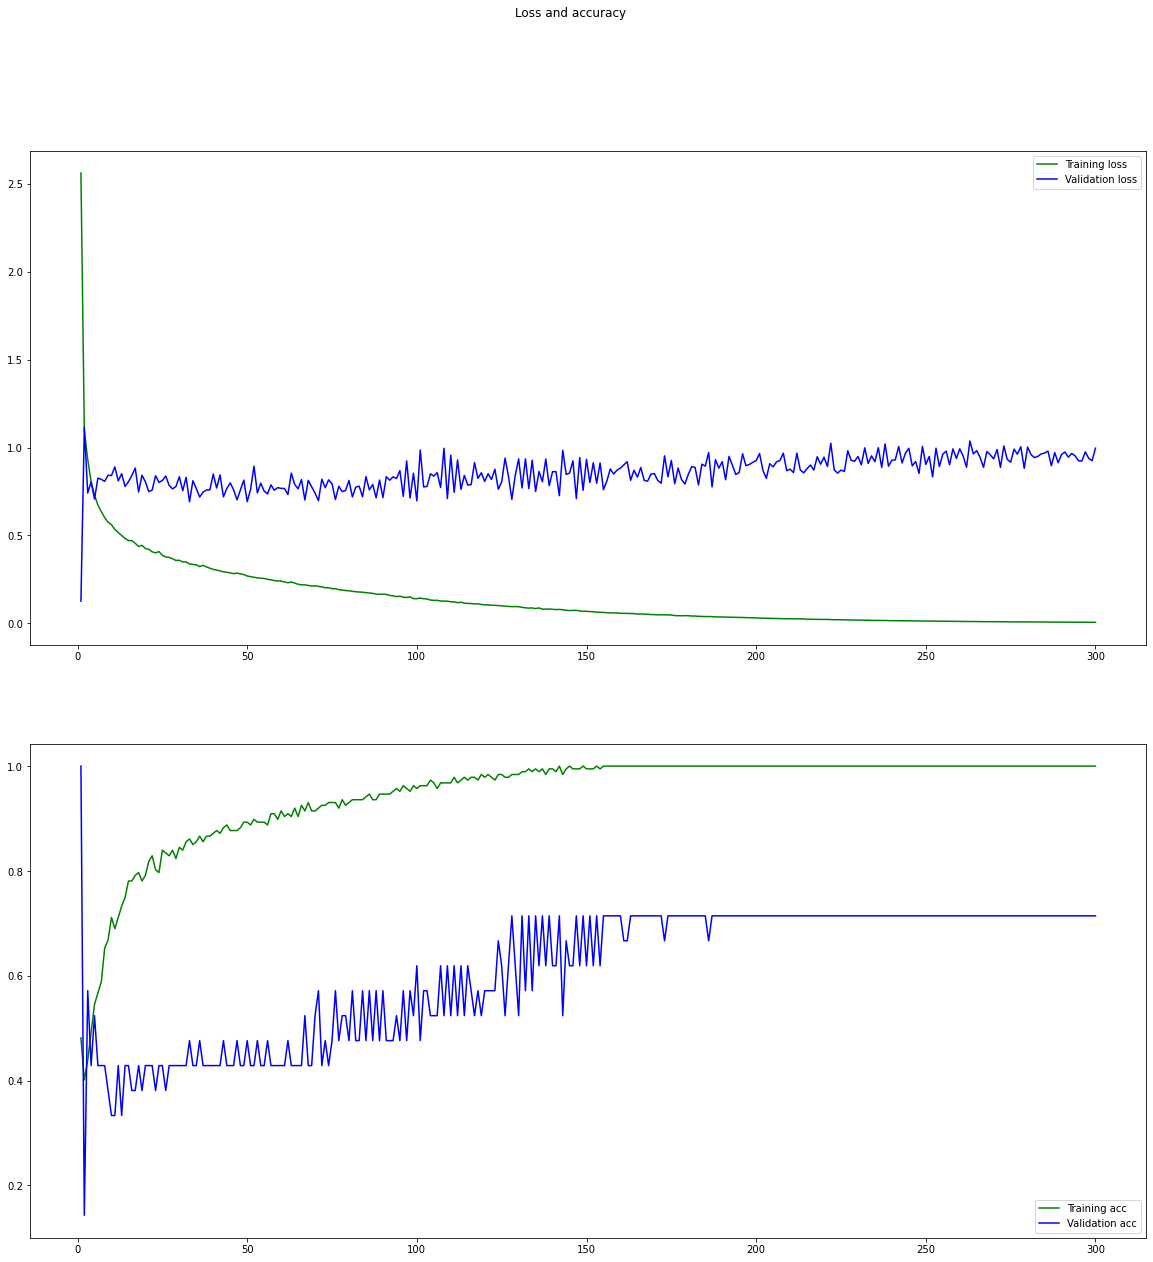

In [9]:
model = Sequential()
model.add(Dense(30, input_dim=60, kernel_initializer=initializers.RandomNormal(stddev=1), activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(1, kernel_initializer=initializers.RandomNormal(stddev=1), activation="sigmoid"))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
training_history = model.fit(X, encoded_Y, epochs=300, batch_size=10, validation_split=0.1, verbose=False)

training_summary(training_history)
plot_results(training_history)

In [10]:
model.summary()
print(model.weights)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_8 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 16        
Total params: 2,311
Trainable params: 2,311
Non-trainable params: 0
_________________________________________________________________
[<tf.Variable 'dense_7/kernel:0' shape=(60, 30) dtype=float32>, <tf.Variable 'dense_7/bias:0' shape=(30,) dtype=float32>, <tf.Variable 'dense_8/kernel:0' shape=(30, 15) dtype=float32>, <tf.Variable 'dense_8/bias:0' shape=(15,) dtype=float32>, <tf.Variable 'dense_9/kernel:0' shape=(15, 1) dtype=float32>, <tf.Variable 'dense_9/bias:0' shape=(1,) dtype=float32>]
